In [1]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd
import os
import re
from fit_current import fit_current
#from fit_plot import fit_plot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


3.35348901594



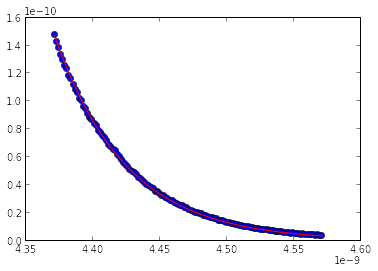

In [29]:
file_path = './test/Z-Spectroscopy_grid_dimer1_461.dat'
data = pd.read_csv(file_path,sep='\t',skiprows=21)
height = data['Z (m)']
current = data['Current [bwd] (A)']
log_current = np.log(current)
z = np.polyfit(height, log_current, 1)
x0 = z[0]*z[0]*9.537e-21
print x0
current_fit = np.exp(z[1])*np.exp(z[0]*height)
log_current_fit = z[0]*height + z[1] 
plt.plot(height,current,'o',height,current_fit,'r')
print 

In [2]:
base_dir = './test/'
files = os.listdir(base_dir)
size = 25
begin = None
end = None
grid = np.zeros((size,size))
error = np.zeros((size,size))
topo = np.zeros((size,size))
for item in files:
    match = re.search(r'Z-Spectroscopy_grid_dimer5_',item)
    if match:
        ind = int(item.split('_')[-1][-7:-4])-1
        #print ind
        ind_x = ind / size
        ind_y = ind % size
        #print ind_x, ind_y,ind
        z, x0, e, z_set = fit_current(base_dir + item,begin,end,1,1)
        grid[ind_x,ind_y] = x0
        error[ind_x,ind_y] = e
        topo[ind_x,ind_y] = z_set

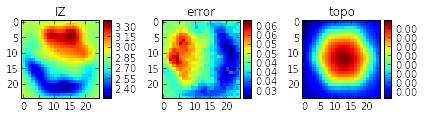

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].set_title('IZ')
ax_freq = axes[0].imshow(np.flipud(grid),interpolation='nearest')
divider_freq = make_axes_locatable(axes[0])
cax_freq = divider_freq.append_axes("right", size="10%", pad=0.05)
cbar_freq = plt.colorbar(ax_freq, cax=cax_freq, format="%.2f")
axes[1].set_title('error')
ax_error = axes[1].imshow(np.flipud(error),interpolation='nearest')
divider_error = make_axes_locatable(axes[1])
cax_error = divider_error.append_axes("right", size="10%", pad=0.05)
cbar_error = plt.colorbar(ax_error, cax=cax_error, format="%.2f")
axes[2].set_title('topo')
ax_topo = axes[2].imshow(np.flipud(topo),interpolation='nearest')
divider_topo = make_axes_locatable(axes[2])
cax_topo = divider_topo.append_axes("right", size="10%", pad=0.05)
cbar_topo = plt.colorbar(ax_topo, cax=cax_topo, format="%.2f")
plt.tight_layout()

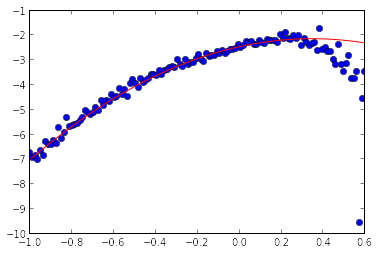

-0.345841992963


In [15]:
data = pd.read_csv('./test/KPFM_test_CN_constz_grid2_204.dat',sep='\t',skiprows=21)
bias = data['Bias calc (V)']
freq = data['Frequency Shift (Hz)']

z = np.polyfit(bias[:100], freq[:100], 2)
fit = z[0] * bias * bias + z[1] * bias + z[2]
error = sum(abs(freq - fit))
plt.plot(bias, freq, 'o', bias, fit, 'r')
plt.show()
print z[1]/(2*z[0])

In [14]:
data = pd.read_csv('./test/KPFM_0_204.dat',sep='\t',skiprows=16)
bias = data['Bias calc (V)']
freq = data['Frequency Shift (Hz)']
z = np.polyfit(bias, freq, 2)
fit = z[0] * bias * bias + z[1] * bias + z[2]
error = sum(abs(freq - fit))
plt.plot(bias, freq, 'o', bias, fit, 'r')
plt.show()
print z[1]/(2*z[0])*1000

IOError: File ./test/KPFM_0_204.dat does not exist